#                Delivery logistics Analysis

### About
 The goal is to identify the major factors affecting delivery cost, understand delivery performance trends,                                        improve prediction accuracy, and assist logistics companies in optimizing their operations              

### Features
*Order Tracking: Real-time visibility of shipment status from dispatch to delivery                                                                       
*Fleet Management: Efficient use of vehicles and drivers                                                                                                 
*Cost Analysis: Fuel usage, delivery cost per order, and operational expenses                                                                            
*Regional Performance Analysis: Identifying high and low performing delivery regions                                                                    
*Customer Satisfaction Metrics: Measuring successful, delayed, and failed deliveries

### Solution
The delivery logistics solution uses data-driven analysis to improve operational efficiency:                                                             
    *Analyze delivery data to identify delay patterns and bottlenecks                                                                                    
    *Improve fleet utilization by balancing load and delivery schedules                                                                                  
    *Reduce costs through fuel optimization and efficient dispatch planning                                                                              
    *Enhance customer satisfaction by increasing on-time delivery rates                                                                                  
    *Use dashboards and reports for real-time monitoring and decision-making              

## import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### import data

In [3]:
df = pd.read_csv("C:\master program in data analytics\FITA\delivery logistics.csv")

In [4]:
df.head()

,delivery_id,delivery_partner,package_type,vehicle_type,delivery_mode,region,weather_condition,distance_km,package_weight_kg,delivery_time_hours,expected_time_hours,delayed,delivery_status,delivery_rating,delivery_cost
0,250.99,delhivery,automobile parts,bike,same day,west,clear,297.0,46.96,00:00.0,00:00.0,no,delivered,3,1632.7206
1,250.99,xpressbees,cosmetics,ev van,express,central,cold,89.6,47.39,00:00.0,00:00.0,no,delivered,5,640.1700
2,250.99,shadowfax,groceries,truck,two day,east,rainy,273.5,26.89,00:00.0,00:00.0,no,delivered,4,1448.1700
3,250.99,dhl,electronics,ev van,same day,east,cold,269.7,12.69,00:00.0,00:00.0,no,delivered,3,1486.5700
4,250.99,dhl,clothing,van,two day,north,foggy,256.7,37.02,00:00.0,00:00.0,no,delivered,4,1394.5600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   delivery_id          25000 non-null  float64
 1   delivery_partner     25000 non-null  object 
 2   package_type         25000 non-null  object 
 3   vehicle_type         25000 non-null  object 
 4   delivery_mode        25000 non-null  object 
 5   region               25000 non-null  object 
 6   weather_condition    25000 non-null  object 
 7   distance_km          25000 non-null  float64
 8   package_weight_kg    25000 non-null  float64
 9   delivery_time_hours  25000 non-null  object 
 10  expected_time_hours  25000 non-null  object 
 11  delayed              25000 non-null  object 
 12  delivery_status      25000 non-null  object 
 13  delivery_rating      25000 non-null  int64  
 14  delivery_cost        25000 non-null  float64
dtypes: float64(4), int64(1), object(10)


In [6]:
df.nunique()

delivery_id            24502
delivery_partner           9
package_type               9
vehicle_type               6
delivery_mode              4
region                     5
weather_condition          6
distance_km             2935
package_weight_kg       4853
delivery_time_hours        1
expected_time_hours        1
delayed                    2
delivery_status            3
delivery_rating            5
delivery_cost          22670
dtype: int64

In [7]:
df.describe()

,delivery_id,distance_km,package_weight_kg,delivery_rating,delivery_cost
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,150.390436,25.145898,3.666000,864.944579
std,7212.732314,86.409745,14.368663,1.149964,435.712593
min,250.990000,3.600000,0.670000,1.000000,95.667400
25%,6250.750000,75.900000,12.680000,3.000000,490.800000
50%,12500.500000,151.000000,25.145000,4.000000,867.535000
75%,18750.250000,224.900000,37.660000,5.000000,1237.910000
max,24750.010000,297.100000,49.520000,5.000000,1632.720600


### cleaning the data

In [8]:
df.isnull().sum()

delivery_id            0
delivery_partner       0
package_type           0
vehicle_type           0
delivery_mode          0
region                 0
weather_condition      0
distance_km            0
package_weight_kg      0
delivery_time_hours    0
expected_time_hours    0
delayed                0
delivery_status        0
delivery_rating        0
delivery_cost          0
dtype: int64

### Finding the duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

## EDA

### Scatter plot 
 This pattern shows that distance in kilometer increases the delivery cost also increases

Text(0.5, 1.0, 'Increase of cost as per distance')

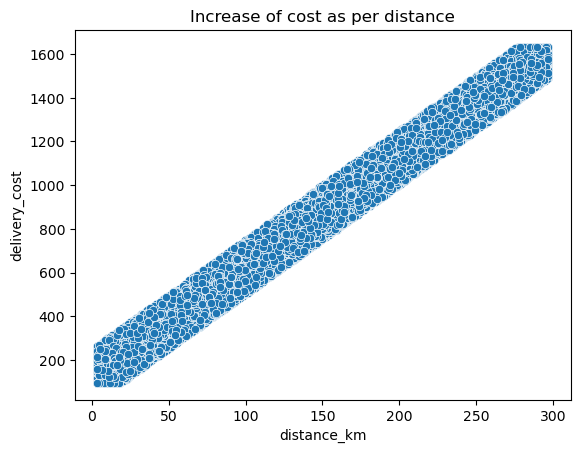

In [10]:
sns.scatterplot(data=df,x="distance_km",y="delivery_cost")
plt.title("Increase of cost as per distance")

### Delivery cost by delivery partner
 In this bar chart shows the how much total delivery cost is associated with a particular delivery partner over the dataset

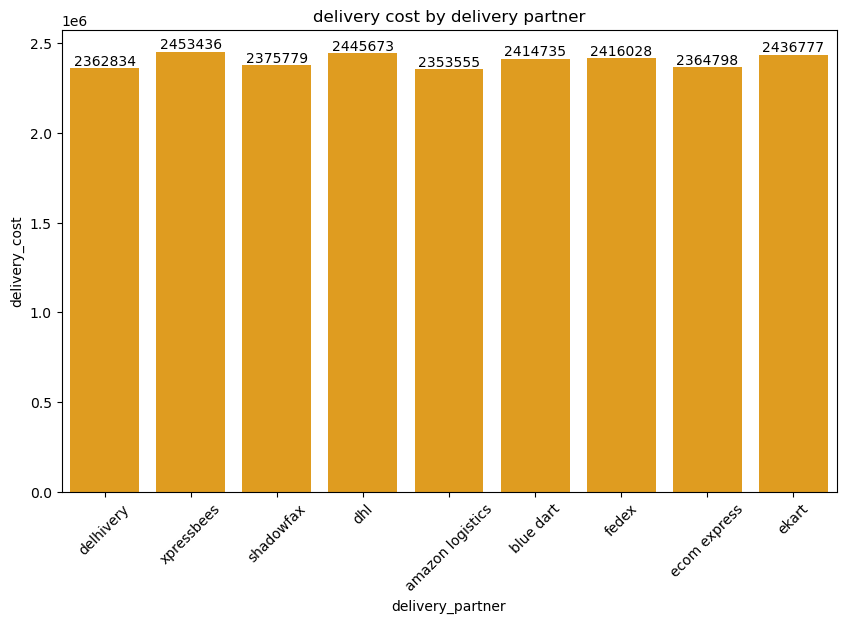

In [11]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df,x="delivery_partner",y="delivery_cost",estimator="sum",ci=None,color="orange")
plt.title("delivery cost by delivery partner")
plt.xlabel("delivery_partner")
plt.ylabel("delivery_cost")
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0],fmt='%.0f')
plt.show()

### order delivery status distribution
This chart analysis the logistics efficiency and rating are not directly influenced by cost and distance 

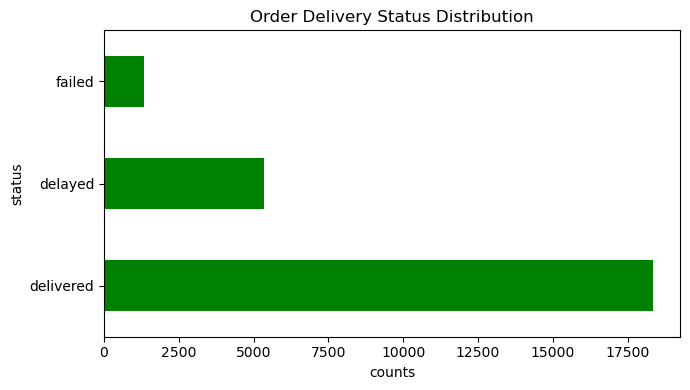

In [12]:
status_cols = [c for c in df.columns if "status" in c.lower() or "delivered" in c.lower()]

if status_cols:
    col = status_cols[0]

    df[col].value_counts().plot(kind='barh', figsize=(7,4),color="green")
    plt.title("Order Delivery Status Distribution")
    plt.xlabel("counts")
    plt.ylabel("status")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

### correlation heatmap of numerical values
 this correlation heatmap shows correlation between the numerical values and shows a strong positive correlation between delivery cost and Distance

<Axes: >

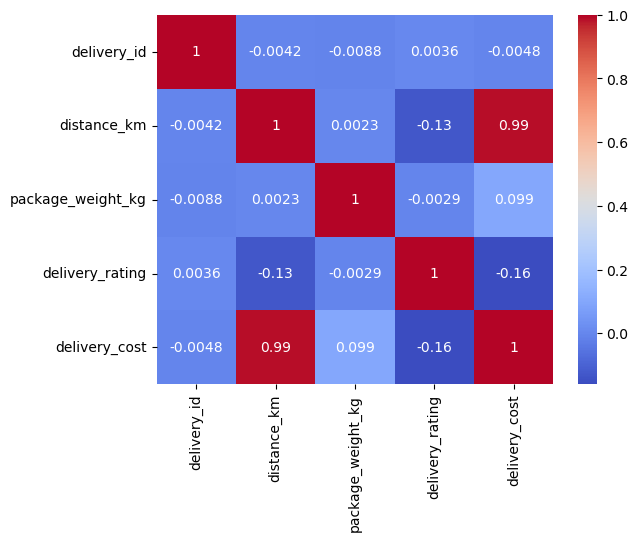

In [13]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="coolwarm")

### Pie chart for vehicle type Distribution
Each slices represents the share of deliveries handled by that vehicle type

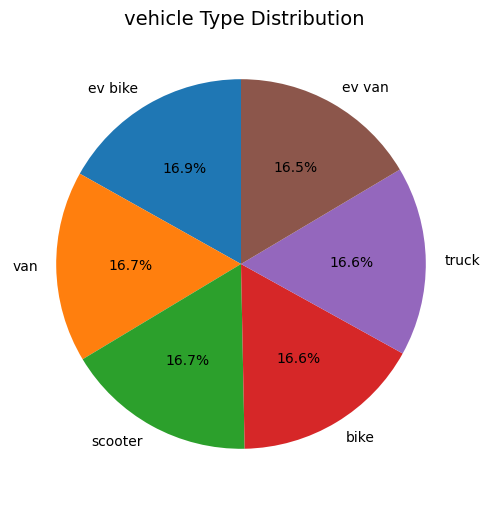

In [14]:
plt.figure(figsize=(8,5))
df["vehicle_type"].value_counts().plot(kind="pie",autopct='%1.1f%%',startangle=90,figsize=(6,6))
plt.title(" vehicle Type Distribution", fontsize=14)
plt.ylabel("")
plt.show()

### Bar chart for delivery rating by delivery partner
Each bar shows how well a delivery partner performed based on customer feedback

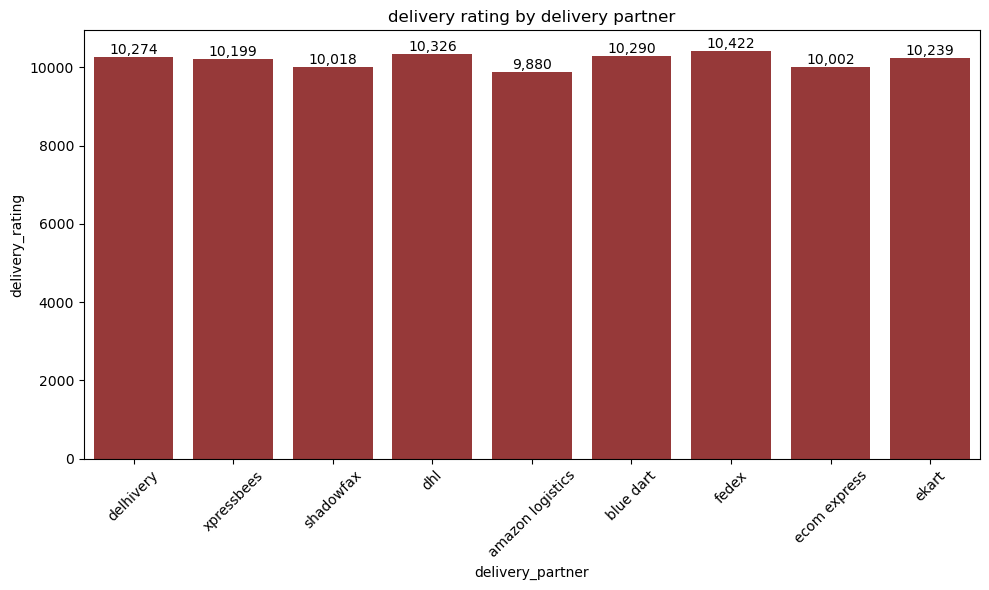

In [15]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df,x="delivery_partner",y="delivery_rating",estimator="sum",ci=None,color="brown")
plt.title("delivery rating by delivery partner")
plt.xlabel("delivery_partner")
plt.ylabel("delivery_rating")
for p in ax.patches:
    value=p.get_height()
    ax.text(p.get_x()+p.get_width()/2,value,f'{value:,.0f}',ha='center',va='bottom',fontsize=10,color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Linear Regression

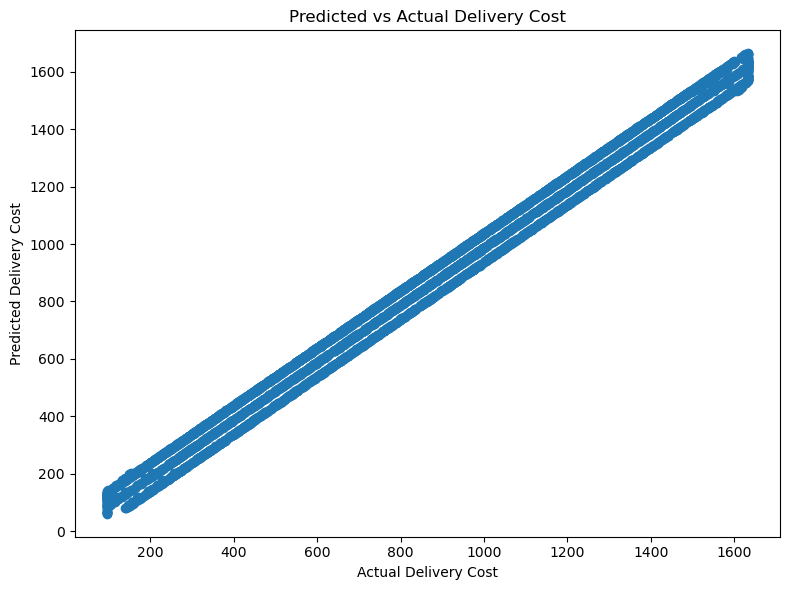

In [18]:
X = df[["distance_km", "package_weight_kg"]]   # Independent variables
y = df["delivery_cost"]                        # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict delivery cost
y_pred = model.predict(X_test)

# Plot Predicted vs Actual Delivery Cost
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)   # No custom colors (as required)
plt.xlabel("Actual Delivery Cost")
plt.ylabel("Predicted Delivery Cost")
plt.title("Predicted vs Actual Delivery Cost")
plt.tight_layout()
plt.show()


In [19]:
from sklearn.preprocessing import MinMaxScaler

if "delivery_cost" in df.columns:
    scaler=MinMaxScaler()
    df["delivery_scaled"]=scaler.fit_transform(df[["delivery_cost"]])
    print("\nDelivery_cost descriptive stats:\n",df["delivery_cost"].describe())
else:
    print("Delivery_cost column not found!")


Delivery_cost descriptive stats:
 count    25000.000000
mean       864.944579
std        435.712593
min         95.667400
25%        490.800000
50%        867.535000
75%       1237.910000
max       1632.720600
Name: delivery_cost, dtype: float64


## Save Output

In [20]:
import os
print("operating system:",os.name)
print("current working Directory:",os.getcwd())

operating system: nt
current working Directory: C:\Users\thama


## conclusion
From this data analysis we showed the good logistics efficency,balanced delivery strategy,how to maintained quality standards
Effective delivery logistics plays a crucial role in supply chain success.
By leveraging data analysis and optimization techniques, organizations can reduce delivery delays, lower operational costs, and improve customer experience.
A well-managed logistics system ensures scalability, reliability, and long-term business growth while meeting increasing customer expectations.